Loading Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

from pandas.api.types import CategoricalDtype

In [3]:
df = pd.read_csv("dailyActivity_merged (1).csv")

Data Exploration

In [4]:
df.shape

(940, 15)

In [5]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [6]:
df.head(8)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035


The dataset stores and tracks the data collected on a daily basis, by the FitBit Fitness tracking devices, such as smartwatches and/or fitness apps. From a quick view we can sumarize the columns as the following:

- Id: is an unique identifier of the users in the survey
- ActivityDate: is the specific date of the entry
- TotalSteps: the total steps each user did each day
- TotalDistance: the total distance each user did each day
- TrackerDistance: is the distance the device tracked each day
- LoggedActivitiesDistance: is the distance tracked by the device on specific activities
- VeryActiveDistance: The distance traveled at a very active physical state?
- ModeratelyActiveDistance: The distance traveled at a moderately active physical state?
- LightActiveDistance: The distance traveled at a lightly active physical state?
- SedentaryActiveDistance: The distance traveled at a sedentary kind of active physical state?
- VeryActiveMinutes: The minutes spent at a very active physical state?
- FairlyActiveMinutes: The minutes spent at a fairly active physical state?
- LightlyActiveMinutes: The minutes spent at a lightly active physical state?
- SedentaryMinutes: The minutes spent at a lightly active physical state?
- Calories: Calories burned that specific day

Once having a look a the columns and the data, we can star the proccess of cleaning

Cleaning the data

Checking Data types

First we have to check if the data types align with the content and purpose of the data in each column, we can use the function .dtypes for that

In [7]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

We can see that the Id columns is an integer, but it should be a string or object in this instance, why? because the Id is only an identifier, and our purpose is not to make mathematic operations with it, sums,multiplications, etc..

Also the ActivityDate columns is an object and should be a Date.

Other than that all the other columns seem to be the correct data type

In [8]:
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'],format="%m/%d/%Y")
df.dtypes # After reformating. We double check the data type

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

Now we check the formats from before and we will convert the Id column from int to str using the .astype(str) function, and the 'ActivityDate' column from object or string, to datetime

Checking column values

After that we can get rid of columns that are not relevant for our analysis. First we note the 'TotalDistance' column, and the other columns related to distance tracking. We see at first glance that 'TotalDistance' and 'Tracker Distance' have similar values, but we are not sure. We also can assum that the 'TrackerDistance' or the 'TotalDistance' is the sum of the different "*ActiveDistance" columns, we may be wrong so we check first.

In [9]:
# We create a new column, adding up the "ActiveDistance" columns to see if it's equal to the 'TotalDistance' column, or the 'TrackerDistance' column
df['sum_distance'] = df['VeryActiveDistance'] + df['ModeratelyActiveDistance'] + df['LightActiveDistance'] + df['SedentaryActiveDistance']

# We also notice that 'LoggedActivitiesDistance' have 0.0 in value in most entries, but we filter to find where has more than 0
df.loc[(df['LoggedActivitiesDistance'] > 0),['TotalDistance','TrackerDistance','LoggedActivitiesDistance','sum_distance']]

,TotalDistance,TrackerDistance,LoggedActivitiesDistance,sum_distance
668,5.27,5.27,1.959596,5.08
689,9.71,7.88,4.081692,9.71
693,9.27,9.08,2.785175,9.26
707,8.72,8.68,3.167822,8.73
711,10.29,9.48,4.869783,10.29
712,9.65,8.60,4.851307,9.65
713,8.24,7.48,3.285415,8.25
717,10.98,9.91,4.930550,10.98
718,10.48,9.50,4.942142,10.48
719,11.31,10.41,4.924841,11.32


The previous finding show that despite 'TotalDistance' and 'TrackerDistance' are not always 100% equal, they are the same in most cases. We also see that there are entries in the 'LoggedActivitiesDistance' higher than 0, but are just a few. And finally we see that the sum of the 'ActiveDistance' columns is equal to the 'TotalDistance' column, only differing by 1 decimal due to rounding up.

So now, we have to decide if we want to keep all the columns, or deleting some, we conclude that the 'TotalDistance' column and the 'TotalDistance' are equal in most cases, (having the TotalDistance higher values). so we decide to keep 'TotalDistance'.

About the 'ActiveDistance' columns, unfortunately we don't have an idea behind the categorization, what is the exact diffence between 'Moderately Active' and 'Very Active', maybe the heartbeat pulse at that moment?, steps per minute?, we don't know from this specific dataset, but we will keep them nonetheless.

The same could be said about the 'ActiveMinutes' columns, so we would just add them up in a new column

In [10]:
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']

Renaming columns

Now, let's rename the columns with the rename function. And also we want to turn them into lower case with the function str.lower()

In [11]:
df.columns = df.columns.str.lower()
df.rename(columns = {'trackerdistance':'tracker_distance','activitydate':'activity_date','totalsteps':'total_steps','totaldistance':'total_distance',
       'loggedactivitiesdistance':'logged_activities_distance', 'veryactivedistance':'very_active_distance',
       'moderatelyactivedistance':'moderately_active_distance', 'lightactivedistance':'light_active_distance',
       'sedentaryactivedistance':'sedentary_active_distance', 'veryactiveminutes':'very_active_minutes',
       'fairlyactiveminutes':'fairly_active_minutes','lightlyactiveminutes':'lightly_active_minutes',
       'sedentaryminutes':'sedentary_minutes'}
         ,inplace=True) # We make the changes permanent by using inplace=True
print('Double check the name of the columns:')
df.columns

Double check the name of the columns:


Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'sum_distance', 'totalminutes'],
      dtype='object')

Creating columns

Let's add a column in which tell us the day of the week using the datetime function day_name(), and another column with the number of the day of the week, using the function weekday

In [12]:
day_of_week = df['activity_date'].dt.day_name()
df['day_of_week'] = day_of_week
df['n_day_of_week'] = df['activity_date'].dt.weekday # 0 represents monday, 6 represents sunday

Checking empty cells and null values

Checking for null values with the function isna().sum()

In [13]:
print('Total number of null values are: ')
print(df.isna().sum())

Total number of null values are: 
id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
sum_distance                  0
totalminutes                  0
day_of_week                   0
n_day_of_week                 0
dtype: int64


In [14]:
print('Total number of duplicated values are: ',df.duplicated().sum())

Total number of duplicated values are:  0


There are no null values nor duplicated entries

Subsetting the data

Now we can select only the columns we will use for our analysis. In this case

In [15]:
df = df[['id', 'activity_date', 'total_steps', 'total_distance',
       #'tracker_distance', 'logged_activities_distance',
       #'very_active_distance', 'moderately_active_distance',
       #'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       #'sum_distance','totalminutes', 
       'day_of_week', 'n_day_of_week'
        ]].copy()

Category creation

Now I'm going to create my own categorization of the users, by level of physical activity and device usage

physical activity would follow these arguments:

- Sedentary: less than 6000 daily steps on average
- Active: between 6000 and 12000 daily steps on average
- Very active: more than 12000 daily steps on average

Device usage will follow these arguments:

- Low use: less than 8 hours of use per day.
- Normal use: between 8 and 16 hours of use per day.
- High use: more than 16 hours of use per day.

For this dataset, I'll only begin by creating the category 'activity_level'. I will create the other category when I analize a dataset which has data stored in an hourly basis

In [16]:
# I first group the data by the id
id_grp = df.groupby(['id'])

# Then I look for the average amount of steps, and sort the results in descending order
id_avg_step = id_grp['total_steps'].mean().sort_values(ascending=False)

# After that, I turn the results into a dataframe
id_avg_step = id_avg_step.to_frame()

# I want to create a new column which tells in which category each user fits into, depending on the average amount of steps
conditions = [
    (id_avg_step <=6000),
    (id_avg_step > 6000) & (id_avg_step < 12000),
    (id_avg_step >= 12000)
] # These are the conditions

values = ['sedentary','active','very_active'] # And here are the name of the values

# I create a column with the numpy function, np.select to asign each id a category
id_avg_step['activity_level'] = np.select(conditions,values)

# I store the results in a variable to use it in the next step
id_activity_level = id_avg_step['activity_level']

# I use a list comprehension to create the column in our original dataset.
# With this list comprehension I retrieve the categories where the index match the id column
df['activity_level'] = [id_activity_level[c] for c in df['id']]

Step 4: Analyze

Let's check how many unique id's there are with the function nunique(). And what are those with the unique() function

In [17]:
print('Number of unique values in id column:',df['id'].nunique())
print()
print('List of id values:',df['id'].unique())

Number of unique values in id column: 33

List of id values: ['1503960366' '1624580081' '1644430081' '1844505072' '1927972279'
 '2022484408' '2026352035' '2320127002' '2347167796' '2873212765'
 '3372868164' '3977333714' '4020332650' '4057192912' '4319703577'
 '4388161847' '4445114986' '4558609924' '4702921684' '5553957443'
 '5577150313' '6117666160' '6290855005' '6775888955' '6962181067'
 '7007744171' '7086361926' '8053475328' '8253242879' '8378563200'
 '8583815059' '8792009665' '8877689391']


and now let's see how much they appear in the dataset with value_counts()

In [18]:
print('How many times each id appear in the dataset?')
print(df['id'].value_counts())

How many times each id appear in the dataset?
id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64


As we can see, there are 33 unique id's or users, and most appear 31 times throughout the dataset, some less than that

Now let's check the date column, what is the minimum date, maximum date, the days between them, and number of unique dates

In [19]:
print('The min date is:',min(df['activity_date']))
print('The max date is:',max(df['activity_date']))
print('The number of unique dates are:',df['activity_date'].nunique())

The min date is: 2016-04-12 00:00:00
The max date is: 2016-05-12 00:00:00
The number of unique dates are: 31


As we can see, we have exactly 31 days, ranging from '2016-04-12' to '2016-05-12'

Now we can start making an exploratory data analysis

In [22]:
df.describe()

,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,n_day_of_week
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574,2.918085
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000,1.000000
50%,2016-04-26 00:00:00,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000,3.000000
75%,2016-05-04 00:00:00,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000,5.000000
max,2016-05-12 00:00:00,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000,6.000000
std,NaN,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862,1.942379


Here we can see the mean or average, the min and max values. the 50% median, etc..

We can already see in the max row that someone walked for 28 miles and someone burned 4900 calories, it could be an outlier so we may pay attention to it later

Step 5.- Share

Correlation between calories steps and calories

What is the correlation between the amount of steps done, and the amount of calories burnt?

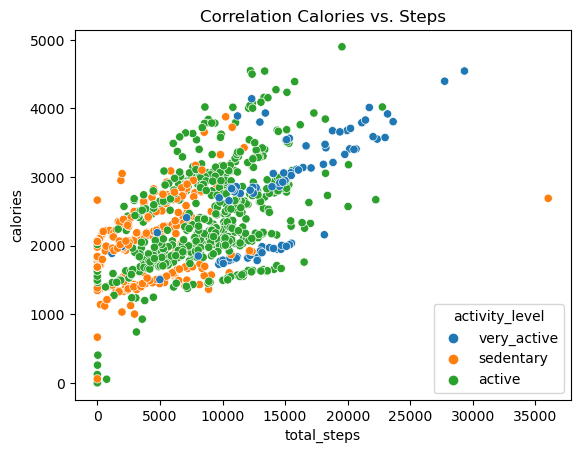

In [23]:
ax =sns.scatterplot(x='total_steps', y='calories', data=df,hue='activity_level')

#handles, labels = ax.get_legend_handles_labels()
#plt.legend(handles, day_of_week, fontsize=7)
plt.title('Correlation Calories vs. Steps')

plt.show()

We can see in this scatterplot a somewhat positive correlation, the more steps done, the more calories burnt. Also we divided the dots by colors, using the activity_level category, so we can see which group is representing the data shown

Average number of steps per day

What is the average number of steps per day?

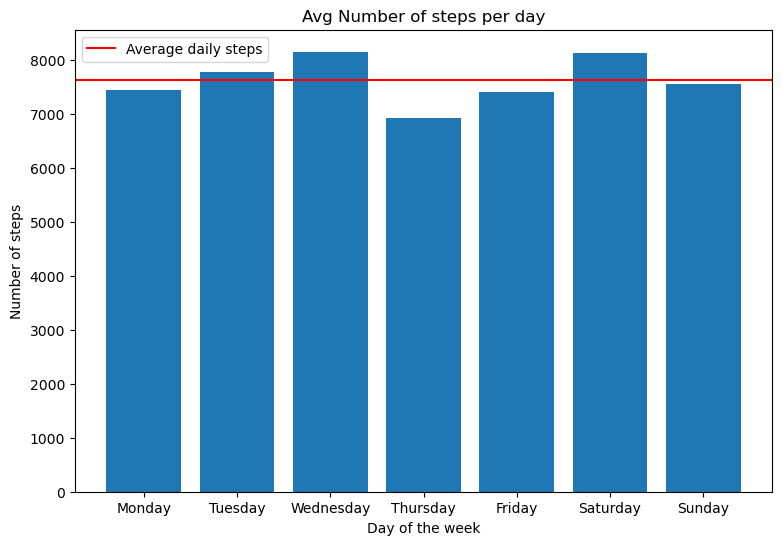

In [24]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday','Sunday']
fig, ax =plt.subplots(1,1,figsize=(9,6))

day_grp = df.groupby(['day_of_week'])
avg_daily_steps= day_grp['total_steps'].mean()
avg_steps = df['total_steps'].mean()

plt.bar(avg_daily_steps.index,avg_daily_steps)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(y=avg_daily_steps.mean(),color='red', label='Average daily steps')
ax.set_ylabel('Number of steps')
ax.set_xlabel('Day of the week')
ax.set_title('Avg Number of steps per day')

plt.legend()
plt.show()

The results show that Monday, Tuesday and Saturday are the days where the users were more physically active and above the average numbert of steps overall. Wednesday, Thursday, and Friday are below the average but the three fell into the same area. Sunday is the least active of all the weekdays.

With this information we can interpret that users tend to be more physically active during the firsts days of the week and during saturdays, giving us a hint of the activities they may do.

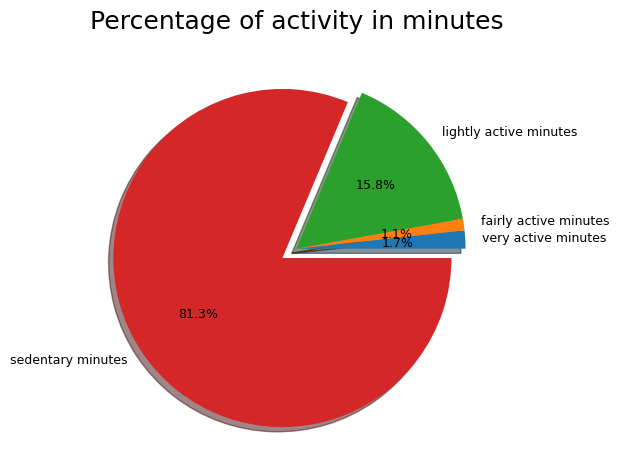

In [25]:
very_active_mins = df['very_active_minutes'].sum() 
fairly_active_mins = df['fairly_active_minutes'].sum()
lightly_active_mins = df['lightly_active_minutes'].sum()
sedentary_mins = df['sedentary_minutes'].sum()

slices = [very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins]
labels = ['very active minutes','fairly active minutes','lightly active minutes','sedentary minutes']
explode = [0,0,0,0.1]
plt.pie(slices, labels = labels, explode = explode, autopct='%1.1f%%',textprops=dict(size=9), shadow=True)

plt.title('Percentage of activity in minutes',fontsize=18)
plt.tight_layout()

plt.show()


This pie chart shows that the users are in a sedentary state of activity most of the time, a sixth of the time doing light activity and only 2% of the time being active doing proper excercise.

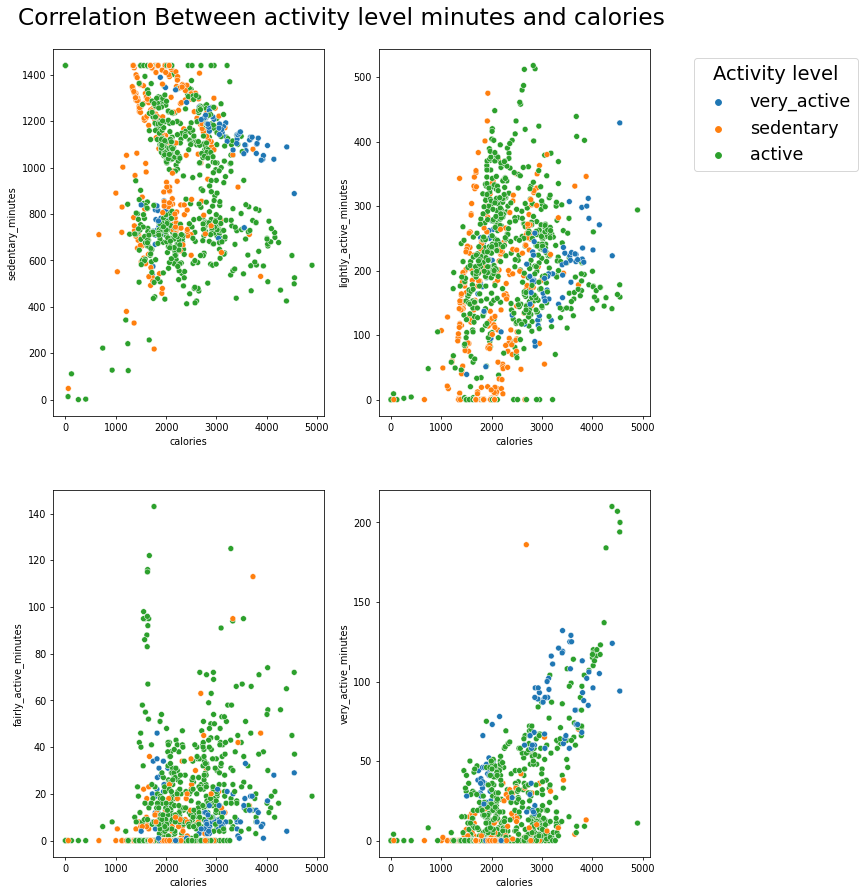

In [26]:
n_day_of_week = [0,1,2,3,4,5,6]

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(11,15),dpi=70)

sns.scatterplot(data=df,x='calories',y='sedentary_minutes',hue='activity_level',ax=axes[0,0],legend=False)

sns.scatterplot(data=df,x='calories',y='lightly_active_minutes',hue='activity_level',ax=axes[0,1],legend=False)

sns.scatterplot(data=df,x='calories',y='fairly_active_minutes',hue='activity_level',ax=axes[1,0],legend=False)

sns.scatterplot(data=df,x='calories',y='very_active_minutes',hue='activity_level',ax=axes[1,1])


plt.legend(title='Activity level',title_fontsize=20,bbox_to_anchor=(1.8,2.2),fontsize=18,frameon=True,scatterpoints=1)
fig.suptitle('Correlation Between activity level minutes and calories',x=0.5,y=0.92,fontsize=24)
plt.show()

Step 6.- Act

After analyzing FitBit Fitness Tracker Data, we have found some insights that would help influence Bellabeat marketing strategy

A multipurpose device

Bellabeat can let know users, that their products are not only meant for sports, or excersice related activities As the data show, many users spend more time wearing the tracking device on weekends than on weekdays, this could mean that they relate the product just to sports or for only the usual walking to the park on sundays Bellabeat can show that their products are meant to acompany them wherever they go for any daily activities, such as work And help them track information to improve overall fitness and health This will encourage women from diverse demographic features and backgrounds to use Bellabeat's product meant for all women who care about overall health

Rewards and reminds

Bellabeat can integrate functions within the bellabeat app or other products, such as rewards or incentives, and reminds to encourage their users to hit certain marks These marks could be achieving the minimum amount of 7 500 steps per day, certain calorie burning for people who want to lose weight, or the 8 hour sleep pattern Certain rewards could be showing a leaderboard of top users who have reached and maintained the minimum steps a day for longer, virtual medals or prizes, such as discounts or offers For the reminds part, Bellabeat could send notifications to their users when they are lagging behind in such goals, and also it could offer recomendations to their users to help them with their sleep, or achieving their goals